We have completed our investigation into the driven oscillators and now we will begin looking into how coupled systems behave.

We'll use similar methods as before, simply applied to these more complicated scenarios.


In [1]:
 import qutip 
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import pandas as pd
import seaborn as sns

(-5.0, 5.0)

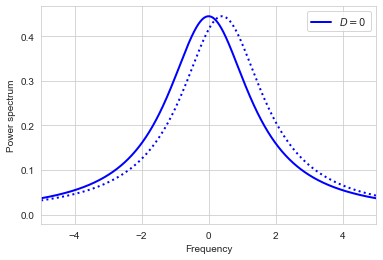

In [99]:
N = 5
a1 = tensor(destroy(N) , qeye(N))
a2 = tensor(qeye(N), destroy(N))

k1 = 1
k2 = (10**4) * k1 # This keeps us in the lowest energy levels.

k1_2 = k1
k2_2 = k2 # Again looks strange but this will let us play around with values later on down the line.
 
Coupling_rate = 0
D = Coupling_rate * k1 # This 0.1 is a variable we can tweak 

detuning = 0.4 * k1 # Again this 0.4 is a variable that can be altered, chose it because its in the paper.
omega = 0
omega_2 = detuning + omega 

H = (omega * a1.dag() * a1 + omega_2 * a2.dag() * a2) # Here we have the Hamiltonian which contains the detuning between each oscillator.

c1 = np.sqrt(k1) * a1.dag() 
c2 = np.sqrt(k2) * (a1**2)

c3 = np.sqrt(k1) * a2.dag() # These are the collapse operators of the 2nd oscillator, they're the same here cause we have like oscillators
c4 = np.sqrt(k2) * (a2**2) # However, when we coupled different oscillators this will be how its done.

c5 = np.sqrt(D) * ( a1 - a2 ) # Disspative coupling term.
Collapse = [c1 , c2 ,c3, c4 , c5] 

wlist = np.linspace(-2, 4, 20000) * 2 * np.pi
spec = spectrum(H, wlist, Collapse, a1.dag(), a1)  
spec_2 = spectrum(H, wlist, Collapse, a2.dag(), a2)  

sns.set_style('whitegrid')
fig, ax = plt.subplots(1, 1)

ax.plot(wlist , spec, 'b', lw=2, label='$D = 0$')
ax.plot(wlist , spec_2, 'b:', lw=2)

ax.legend()
ax.set_xlabel('Frequency')
ax.set_ylabel('Power spectrum')
ax.set_xlim(-5,5)


# We can clearly see that the detuning terms cause the peak frequencies to be shifted by said detuning.
# This is nice to see that the graphs and the equations are all in agreement etc...


(-5.0, 5.0)

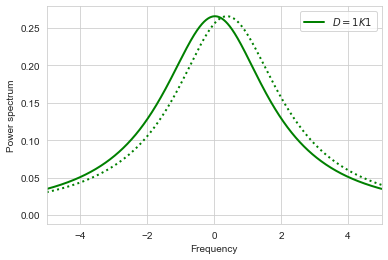

In [90]:
Coupling_rate = 1
D = Coupling_rate * k1

c5 = np.sqrt(D) * ( a1 - a2 )
Collapse = [c1 , c2 ,c3, c4 , c5] 

spec_k1 = spectrum(H, wlist, Collapse, a1.dag(), a1)  
spec_2_k1 = spectrum(H, wlist, Collapse, a2.dag(), a2)  

sns.set_style('whitegrid')
fig, ax = plt.subplots(1, 1)

ax.plot(wlist , spec_k1, 'g', lw=2, label='$D = 1K1 $')
ax.plot(wlist , spec_2_k1, 'g:', lw=2)

ax.legend()
ax.set_xlabel('Frequency')
ax.set_ylabel('Power spectrum')
ax.set_xlim(-5,5)



-0.10367774145553521

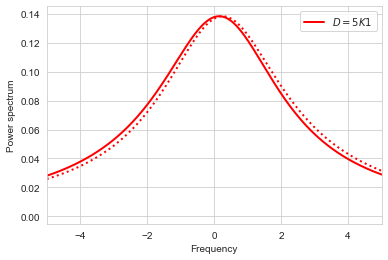

In [110]:
Coupling_rate = 5
D = Coupling_rate * k1

c5 = np.sqrt(D) * ( a1 - a2 )
Collapse = [c1 , c2 ,c3, c4 , c5] 

spec_5k1 = spectrum(H, wlist, Collapse, a1.dag(), a1)  
spec_2_5k1 = spectrum(H, wlist, Collapse, a2.dag(), a2)  

sns.set_style('whitegrid')
fig, ax = plt.subplots(1, 1)

ax.plot(wlist , spec_5k1, 'r', lw=2, label='$D = 5K1 $')
ax.plot(wlist , spec_2_5k1, 'r:', lw=2)

ax.legend()
ax.set_xlabel('Frequency')
ax.set_ylabel('Power spectrum')
ax.set_xlim(-5,5)

wlist[(spec_5k1).argmax()]-wlist[(spec_2_5k1).argmax()]

-0.03581594704827448 0.182221484982458


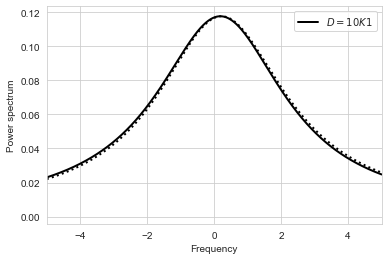

In [113]:
Coupling_rate = 10
D = Coupling_rate * k1

c5 = np.sqrt(D) * ( a1 - a2 )
Collapse = [c1 , c2 ,c3, c4 , c5] 

spec_10k1 = spectrum(H, wlist, Collapse, a1.dag(), a1)  
spec_2_10k1 = spectrum(H, wlist, Collapse, a2.dag(), a2)  

sns.set_style('whitegrid')
fig, ax = plt.subplots(1, 1)

ax.plot(wlist , spec_10k1, 'k', lw=2, label='$D = 10K1 $')
ax.plot(wlist , spec_2_10k1, 'k:', lw=2)

ax.legend()
ax.set_xlabel('Frequency')
ax.set_ylabel('Power spectrum')
ax.set_xlim(-5,5)

Diff = wlist[(spec_10k1).argmax()]-wlist[(spec_2_10k1).argmax()]#We can see that the difference in frequency of each peak reduces as the drive increases as we'd expect.
value = wlist[(spec_10k1).argmax()] 
print (Diff , value)

# The difference tends to 0 and the actual value tends to (w1 + w2)/2 which is expected for idential oscillators.

(-5.0, 5.0)

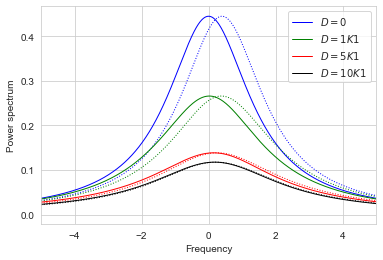

In [102]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(1, 1)

ax.plot(wlist , spec, 'b', lw=1, label='$D = 0$')
ax.plot(wlist , spec_2, 'b:', lw=1)

ax.plot(wlist , spec_k1, 'g', lw=1, label='$D = 1K1 $')
ax.plot(wlist , spec_2_k1, 'g:', lw=1)

ax.plot(wlist , spec_5k1, 'r', lw=1, label='$D = 5K1 $')
ax.plot(wlist , spec_2_5k1, 'r:', lw=1)

ax.plot(wlist , spec_10k1, 'k', lw=1, label='$D = 10K1 $')
ax.plot(wlist , spec_2_10k1, 'k:', lw=1)

ax.legend()
ax.set_xlabel('Frequency')
ax.set_ylabel('Power spectrum')
ax.set_xlim(-5,5)


#Here we get a showcase of:
# How we can choose how offset the two oscillators are via the detuning ( Distance between peaks )
# The increase in coupling strength causes the oscillators to find a median frequency.


In [ ]:
# From here, we can then go onto find the observed detunings as a function of initial detuning. Then do this for various coupling strengths.
# Once we've done this 